In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [108]:
DRIVE = 'data/'

In [109]:
#!git clone https://github.com/nina-adhikari/disease-prediction

In [110]:
!pip install git+https://github.com/nina-adhikari/disease_prediction

  Cloning https://github.com/nina-adhikari/disease_prediction to /private/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/pip-req-build-66xxptw6
  Running command git clone --filter=blob:none --quiet https://github.com/nina-adhikari/disease_prediction /private/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/pip-req-build-66xxptw6
  Resolved https://github.com/nina-adhikari/disease_prediction to commit d5cc3b6ab57930402bfd4f8652ec931229f0855e
  Preparing metadata (setup.py) ... done


In [111]:
from disease_prediction.data import datasets as ds

In [112]:
df = ds.load_datasets(subsets=['train', 'test', 'validate'], directory=DRIVE)

In [113]:
train_df = df['train']

In [114]:
train_df.head()

,AGE,SEX,PATHOLOGY,INITIAL_EVIDENCE,swollen_nodes,std,sweating,diarrhea,pain,pain_char,...,ca_blockers,vag_discharge,wheezing_inhale,fatigue,menarche_12,breastfed_9,confusion,contact,ebolacase,bruising
1,21,M,HIV (initial infection),sweating,0,0,0,0,0,NA,...,0,0,0,0,0,0,0,0,0,0
10,8,M,Allergic sinusitis,itchy_nose,0,0,0,0,1,heavy,...,0,0,0,0,0,0,0,0,0,0
13,49,F,Anaphylaxis,lost_consciousness,0,0,0,0,0,NA,...,0,0,0,0,0,0,0,0,0,0
18,69,M,Tuberculosis,cough,0,0,0,0,1,heavy,...,0,0,0,0,0,0,0,0,0,0
19,30,F,Tuberculosis,cough_blood,0,0,0,0,1,sharp,...,0,0,0,0,0,0,0,0,0,0


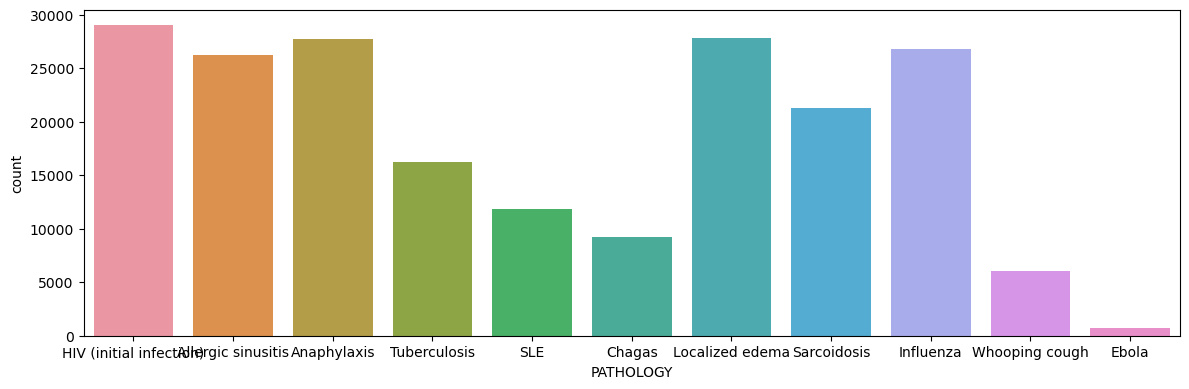

In [115]:
plt.figure(figsize=(12, 4))
sns.countplot(data=train_df, x='PATHOLOGY') 
plt.tight_layout()

In [116]:
# Ebola counts are very low
# maybe drop it... (haven't dropped it yet)

In [117]:
# feature columns
train_df.columns

Index(['AGE', 'SEX', 'PATHOLOGY', 'INITIAL_EVIDENCE', 'swollen_nodes', 'std',
       'sweating', 'diarrhea', 'pain', 'pain_char', 'pain_somewhere',
       'pain_intensity', 'pain_radiate', 'pain_precise', 'pain_sudden',
       'fever', 'unprotected_sex', 'lesions', 'lesion_color',
       'lesions_peeling', 'lesion_pain_swollen', 'lesion_location',
       'lesion_pain_intense', 'lesion_larger_than_1cm', 'itching_severity',
       'nausea', 'weight_loss', 'sex_hiv', 'trav1', 'fam_allergies', 'fam_j45',
       'j45', 'itchy_nose', 'eye_itching', 'runny_nose', 'urban1',
       'severe_allergy', 'contact_allergy', 'short_breath', 'swelling',
       'swelling_location', 'lost_consciousness', 'stridor', 'z84.89', 'HIV',
       'cortico', 'IV_drugs', 'e10_e11', 'f10.129', 'cough', 'cough_blood',
       'v85.0', 'I30', 'f17.210', 'high_bp', 'ulcers', 'anorexia',
       'new_fatigue', 'nsaids', 'i50', 'i80', 'lymph_surg', 'synd_nephro',
       'convulsion', 'e66', 'red_eye', 'agri', 'gained_weig

In [118]:
# binary columns
bin_cols = [col for col in train_df.columns if train_df[col].nunique() == 2]

In [119]:
# columns with more than 2 unique values
for col in train_df.columns:
    if train_df[col].nunique() > 2:
        print(col, train_df[col].nunique())

AGE 110
PATHOLOGY 11
INITIAL_EVIDENCE 38
pain_char 11
pain_somewhere 51
pain_intensity 10
pain_precise 11
pain_sudden 9
lesion_color 4
lesion_pain_swollen 7
lesion_location 29
lesion_pain_intense 9
itching_severity 10
trav1 8
swelling_location 15


In [120]:
# AGE is good continuous variable

In [121]:
# INITIAL_EVIDENCE
train_df['INITIAL_EVIDENCE'].value_counts()

INITIAL_EVIDENCE
pain                  32936
swelling              14651
lesions               13323
cough                 12459
short_breath          11127
runny_nose            10447
fever                  9886
swollen_nodes          7532
itchy_nose             6976
eye_itching            6013
gained_weight          5597
nausea                 5327
diarrhea               5222
weight_loss            4974
fatigue_ext            4889
sweating               4502
muscle_pain            4406
sore_throat            3963
cough_blood            3591
vomiting_cough         3040
convulsion             2914
red_eye                2901
contact_allergy        2705
vag_discharge          2283
chills                 2231
dizziness              2164
lost_consciousness     2073
stridor                2043
wheezing_exhale        1957
lost_appetite          1927
ulcers                 1861
fatigue                1684
coughing_fits          1600
wheezing_inhale        1430
new_fatigue            1173
ano

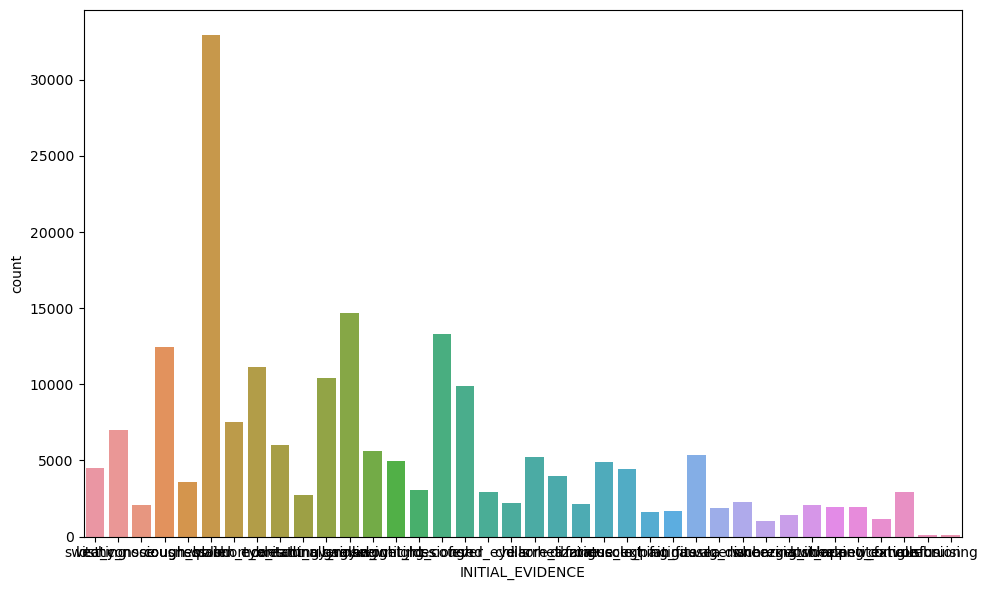

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='INITIAL_EVIDENCE')
plt.tight_layout()

In [123]:
# convert to binary using pandas get_dummies
train_df = pd.get_dummies(train_df, columns=['INITIAL_EVIDENCE'])

In [124]:
# pain_char
train_df['pain_char'].value_counts()

pain_char
NA                171596
sharp              11206
exhausting          8819
heavy               2467
sensitive           2168
a pulse             1625
burning             1518
a cramp             1512
a knife stroke      1129
tugging              576
tedious              392
Name: count, dtype: int64

In [125]:
# could be made continous... but for now I will convert to binary
# convert to binary using pandas get_dummies
train_df = pd.get_dummies(train_df, columns=['pain_char'], drop_first=True)

In [126]:
# pain_somewhere
train_df['pain_somewhere'].value_counts()

pain_somewhere
nowhere                          171596
temple(L)                          4540
epigastric                         3558
temple(R)                          2517
forehead                           2363
shoulder(L)                        2344
sole(L)                            1957
occiput                            1918
finger (middle)(L)                 1669
sole(R)                            1662
shoulder(R)                        1372
belly                              1248
dorsal aspect of the foot(L)       1070
pharynx                             952
finger (middle)(R)                  549
hypochondrium(L)                    515
pubis                               505
dorsal aspect of the foot(R)        488
top of the head                     421
hypochondrium(R)                    227
finger (index)(L)                   146
palmar face of the wrist(R)         146
calf(R)                             143
dorsal aspect of the wrist(L)       143
dorsal aspect of the wris

In [127]:
# too many values for get_dummies
# convert to binary with nowhere as 0 and anywhere else as 1
train_df['pain_somewhere'] = (train_df['pain_somewhere'] != 'nowhere').astype(int)

In [128]:
# pain_intensity
train_df[['pain_intensity', 'pain_precise', 'pain_sudden']]

# good continuous variables

,pain_intensity,pain_precise,pain_sudden
1,0,0,0
10,6,8,8
13,0,0,0
18,8,5,0
19,9,1,3
...,...,...,...
1023490,0,0,0
1023491,0,0,0
1023492,0,0,0
1023493,0,0,0


In [129]:
# lesion_color
train_df['lesion_color'].value_counts()

lesion_color
NA      184275
pink     10374
pale      6024
red       2335
Name: count, dtype: int64

In [130]:
# convert to binary using pandas get_dummies
train_df = pd.get_dummies(train_df, columns=['lesion_color'], drop_first=True)

In [131]:
# lesion_pain_swollen and lesion_pain_intense
train_df[['lesion_pain_swollen', 'lesion_pain_intense']]

# good continuous variables

,lesion_pain_swollen,lesion_pain_intense
1,0,0
10,0,0
13,0,0
18,0,2
19,5,2
...,...,...
1023490,0,0
1023491,0,0
1023492,0,0
1023493,0,0


In [132]:
# lesion_location
train_df['lesion_location'].value_counts()

lesion_location
nowhere                184275
forehead                 2154
internal cheek(L)        1816
ankle(R)                 1711
nose                     1597
internal cheek(R)        1567
thyroid cartilage        1362
bottom lip(R)            1320
side of the neck(L)      1320
ankle(L)                 1210
side of the neck(R)       768
cervical spine            748
upper lip(R)              716
cheek(L)                  539
back of the neck          463
thoracic spine            371
palace                    367
cheek(R)                  199
penis                     170
lumbar spine              160
thigh(R)                   74
labia minora(R)            35
thigh(L)                   20
labia minora(L)            16
scrotum                    11
shoulder(R)                 9
under the tongue            6
epigastric                  2
shoulder(L)                 2
Name: count, dtype: int64

In [133]:
# convert to binary using pandas get_dummies
train_df = pd.get_dummies(train_df, columns=['lesion_location'], drop_first=True)

In [134]:
# itching_severity
train_df['itching_severity'].value_counts()

# good continuous variable

itching_severity
0     191691
10      1429
9       1420
8       1411
7       1409
2       1385
1       1345
3       1342
5        789
4        787
Name: count, dtype: int64

In [135]:
# trav1
train_df['trav1'].value_counts()

trav1
N                  200685
North America        1523
West Africa           322
South Africa          149
South America         110
Central America        98
Europe                 67
Asia                   54
Name: count, dtype: int64

In [136]:
# for now convert to whether travelled or not
train_df['trav1'] = (train_df['trav1'] != 'N').astype(int)

In [137]:
train_df['trav1'].value_counts()

trav1
0    200685
1      2323
Name: count, dtype: int64

In [138]:
# swelling_location
train_df['swelling_location'].value_counts()

swelling_location
nowhere                         191742
nose                              4060
dorsal aspect of the foot(L)      1897
dorsal aspect of the foot(R)      1599
sole(R)                           1238
cheek(L)                          1162
sole(L)                            866
cheek(R)                           321
forehead                            98
calf(R)                              9
thigh(L)                             8
calf(L)                              4
toe (1)(L)                           2
toe (1)(R)                           1
thigh(R)                             1
Name: count, dtype: int64

In [139]:
# convert to binary using pandas get_dummies
train_df = pd.get_dummies(train_df, columns=['swelling_location'], drop_first=True)

In [140]:
# convert SEX column to binary
train_df = pd.get_dummies(train_df, columns=['SEX'], drop_first=True)

In [141]:
train_df.head()

,AGE,PATHOLOGY,swollen_nodes,std,sweating,diarrhea,pain,pain_somewhere,pain_intensity,pain_radiate,...,swelling_location_forehead,swelling_location_nose,swelling_location_nowhere,swelling_location_sole(L),swelling_location_sole(R),swelling_location_thigh(L),swelling_location_thigh(R),swelling_location_toe (1)(L),swelling_location_toe (1)(R),SEX_M
1,21,HIV (initial infection),0,0,0,0,0,0,0,nowhere,...,False,False,True,False,False,False,False,False,False,True
10,8,Allergic sinusitis,0,0,0,0,1,1,6,nowhere,...,False,False,False,False,False,False,False,False,False,True
13,49,Anaphylaxis,0,0,0,0,0,0,0,nowhere,...,False,False,True,False,False,False,False,False,False,False
18,69,Tuberculosis,0,0,0,0,1,1,8,nowhere,...,False,False,True,False,False,False,False,False,False,True
19,30,Tuberculosis,0,0,0,0,1,1,9,nowhere,...,False,True,False,False,False,False,False,False,False,False


In [142]:
# pain_radiate
train_df['pain_radiate'].value_counts()

pain_radiate
nowhere    203008
Name: count, dtype: int64

In [143]:
# has the same values everywhere
# drop it
train_df.drop('pain_radiate', axis=1, inplace=True)

In [144]:
# lesion_larger_than_1cm
train_df['lesion_larger_than_1cm'].value_counts()

lesion_larger_than_1cm
N    184275
Y     18733
Name: count, dtype: int64

In [145]:
# convert to binary
train_df['lesion_larger_than_1cm'] = (train_df['lesion_larger_than_1cm'] == 'Y').astype(int)

In [146]:
# lesions_peeling
train_df['lesions_peeling'].value_counts()

lesions_peeling
N    203008
Name: count, dtype: int64

In [147]:
# same values everywhere
# drop it
train_df.drop('lesions_peeling', axis=1, inplace=True)

In [148]:
cols_list = train_df.columns
print(len(cols_list))

# checking all cols are numeric now
train_df[cols_list[10:20]].sample(10)

180


,pain_sudden,fever,unprotected_sex,lesions,lesion_pain_swollen,lesion_pain_intense,lesion_larger_than_1cm,itching_severity,nausea,weight_loss
851521,0,0,0,0,0,0,0,0,0,0
988373,0,0,0,0,0,0,0,0,0,0
1005975,0,0,0,0,0,0,0,0,0,0
872374,0,0,0,0,0,0,0,0,0,0
631970,0,0,0,0,0,0,0,0,0,0
376124,0,0,0,0,0,0,0,0,0,0
714786,0,0,0,0,0,0,0,0,0,0
931361,0,0,0,0,0,0,0,0,0,0
363827,0,0,0,0,0,0,0,0,0,0
689178,0,0,0,0,0,0,0,0,0,0


In [149]:
# FINAL train_df dataset
train_df.sample(5)

,AGE,PATHOLOGY,swollen_nodes,std,sweating,diarrhea,pain,pain_somewhere,pain_intensity,pain_precise,...,swelling_location_forehead,swelling_location_nose,swelling_location_nowhere,swelling_location_sole(L),swelling_location_sole(R),swelling_location_thigh(L),swelling_location_thigh(R),swelling_location_toe (1)(L),swelling_location_toe (1)(R),SEX_M
247906,43,Allergic sinusitis,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
1021907,62,HIV (initial infection),0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,True
329219,65,SLE,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
993153,46,Localized edema,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
392386,21,Tuberculosis,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,True


## Train-Test Split

In [150]:
# inddependent variables
X = train_df.drop(columns=['PATHOLOGY'])

# dependent variable
y = train_df['PATHOLOGY']

In [151]:
# train test split
# for now I am creating a train test split on the train_df itself
# I will use the test and validate datasets later

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

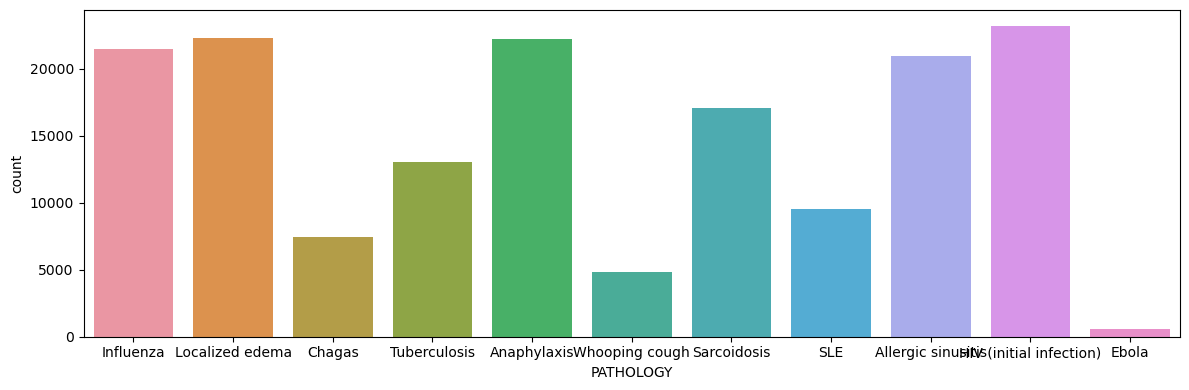

In [152]:
plt.figure(figsize=(12, 4))
sns.countplot(data=pd.DataFrame(y_train), x='PATHOLOGY')
plt.tight_layout()

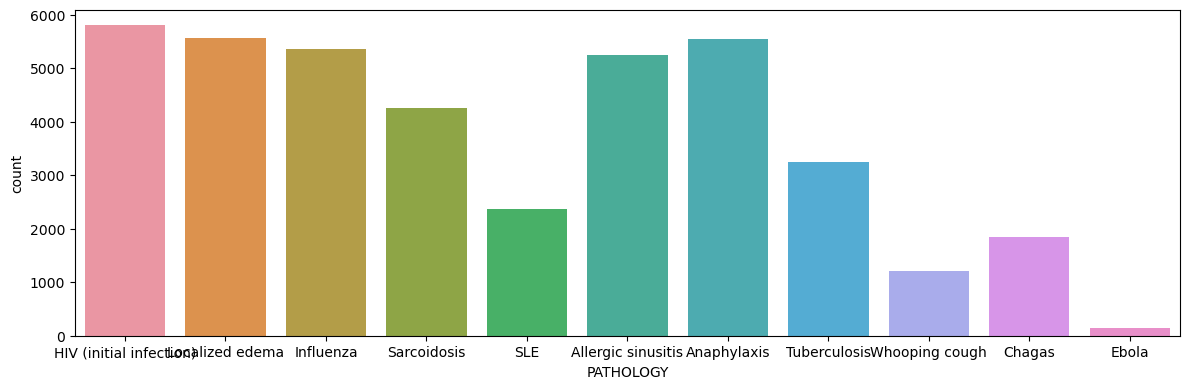

In [153]:
plt.figure(figsize=(12, 4))
sns.countplot(data=pd.DataFrame(y_test), x='PATHOLOGY')
plt.tight_layout()

In [154]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()

In [156]:
# fit the scaler on the training data
scaler.fit(X_train)

StandardScaler()

In [157]:
# transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

In [158]:
# metrics
# accuracy, precision, recall, f1, classification report, confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
# fit the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [161]:
# test prediction
y_pred = lr.predict(X_test_scaled)

In [162]:
# classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                         precision    recall  f1-score   support

     Allergic sinusitis       0.83      0.89      0.86      5241
            Anaphylaxis       0.84      0.43      0.57      5544
                 Chagas       0.97      0.24      0.38      1850
                  Ebola       1.00      0.23      0.37       144
HIV (initial infection)       0.39      0.55      0.45      5803
              Influenza       0.66      0.33      0.44      5362
        Localized edema       0.52      0.99      0.69      5565
                    SLE       0.88      0.30      0.45      2373
            Sarcoidosis       0.58      0.70      0.63      4257
           Tuberculosis       0.55      0.52      0.53      3249
         Whooping cough       1.00      1.00      1.00      1214

               accuracy                           0.60     40602
              macro avg       0.75      0.56      0.58     40602
           weighted avg       0.67      0.60      0.59     40602

[[4640    0    0    0 

<Axes: >

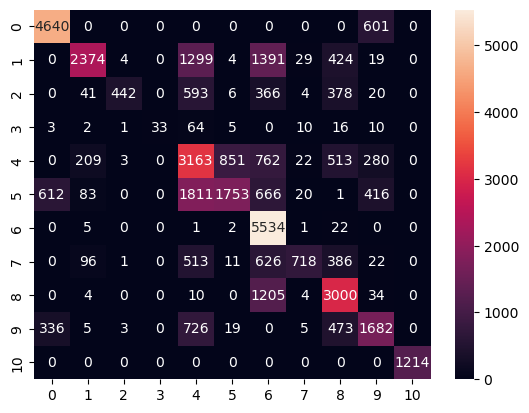

In [163]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### Decision Tree Classifier

In [197]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [198]:
# test prediction
y_pred = dt.predict(X_test_scaled)

In [199]:
# classification report, confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                         precision    recall  f1-score   support

     Allergic sinusitis       0.81      0.87      0.84      5241
            Anaphylaxis       0.63      0.53      0.58      5544
                 Chagas       0.60      0.26      0.37      1850
                  Ebola       0.60      0.23      0.33       144
HIV (initial infection)       0.40      0.40      0.40      5803
              Influenza       0.52      0.37      0.43      5362
        Localized edema       0.54      0.92      0.68      5565
                    SLE       0.56      0.37      0.44      2373
            Sarcoidosis       0.62      0.62      0.62      4257
           Tuberculosis       0.50      0.52      0.51      3249
         Whooping cough       1.00      1.00      1.00      1214

               accuracy                           0.59     40602
              macro avg       0.62      0.55      0.56     40602
           weighted avg       0.59      0.59      0.57     40602

[[4553    0    0    5 

<Axes: >

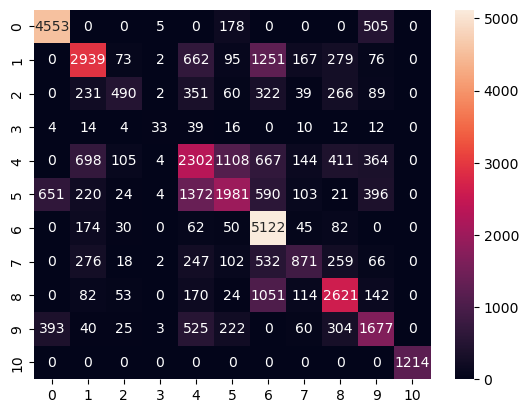

In [200]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
# fitting the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [206]:
# prediction
y_pred = rf.predict(X_test_scaled)

In [207]:
# classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                         precision    recall  f1-score   support

     Allergic sinusitis       0.81      0.89      0.85      5241
            Anaphylaxis       0.66      0.51      0.58      5544
                 Chagas       0.81      0.25      0.38      1850
                  Ebola       0.97      0.23      0.37       144
HIV (initial infection)       0.41      0.40      0.40      5803
              Influenza       0.55      0.37      0.45      5362
        Localized edema       0.53      0.97      0.69      5565
                    SLE       0.61      0.35      0.45      2373
            Sarcoidosis       0.61      0.62      0.61      4257
           Tuberculosis       0.49      0.53      0.51      3249
         Whooping cough       1.00      1.00      1.00      1214

               accuracy                           0.59     40602
              macro avg       0.68      0.56      0.57     40602
           weighted avg       0.61      0.59      0.58     40602

[[4683    0    0    0 

<Axes: >

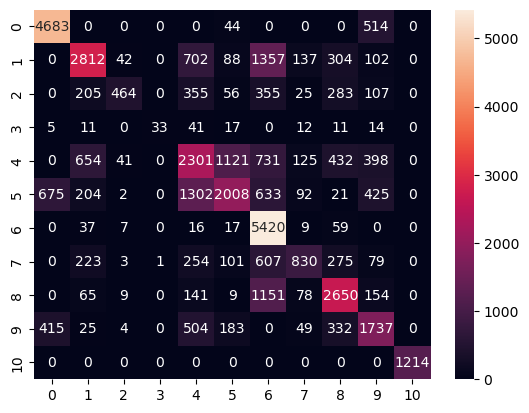

In [208]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### XGBoost

In [241]:
# XGBoost classifier
from xgboost import XGBClassifier

In [242]:
# defining the f2 metric (since there isn't one built-in, it's a common special case of fbeta metric)
# Note: this is the negative since xgboost minimizes its objective function

# import fbeta_score
from sklearn.metrics import fbeta_score

def f2_eval(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred_binary = (y_pred > 0.5).astype(int)

    f2 = fbeta_score(y_true, y_pred_binary, beta=2)
    
    return 'f2_score', -f2

In [243]:
# computing weights for the classes
# helps since the classes are imbalanced in our dataset
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
sample_weights

array([0.68830684, 0.68830684, 0.66326064, ..., 0.63611296, 0.63611296,
       0.70433078])

In [244]:
# xgboost requires the labels to be integers
# converting the y labels to integers from 0 to 10
# doing it for train and test data
y_train_int = y_train.astype('category').cat.codes
y_test_int = y_test.astype('category').cat.codes

In [245]:
#y_train.value_counts(), y_train_int.value_counts()
#y_test.value_counts(), y_test_int.value_counts()

In [246]:
# making the xgboost model and training it to make sure everything's set up properly
# objective = multi:softmax for multiclass classification
# missing = -999 because we don't have any missing data
# seed = 42 is random, just using 42 for all random seeds
# sample weight is the class weights we computed above
# learning_rate=0.3 to start out high and make hyperparameter tuning faster
# we'll tune the other hyperparameters below

xgb_clf = XGBClassifier(objective='multi:softmax', 
                                missing=-999, 
                                seed=42, 
                                learning_rate=0.1,
                                early_stopping_rounds = 20)

In [247]:
# fitting the model
xgb_clf = xgb_clf.fit(X_train_scaled,
                      y_train_int, 
                      verbose=True, 
                      sample_weight=sample_weights,
                      eval_set = [(X_test_scaled, y_test_int)])

[0]	validation_0-mlogloss:2.16192
[1]	validation_0-mlogloss:2.01017
[2]	validation_0-mlogloss:1.89588
[3]	validation_0-mlogloss:1.80406
[4]	validation_0-mlogloss:1.72738
[5]	validation_0-mlogloss:1.66193
[6]	validation_0-mlogloss:1.60611
[7]	validation_0-mlogloss:1.55699
[8]	validation_0-mlogloss:1.51336
[9]	validation_0-mlogloss:1.47427
[10]	validation_0-mlogloss:1.43901
[11]	validation_0-mlogloss:1.40738
[12]	validation_0-mlogloss:1.37832
[13]	validation_0-mlogloss:1.35152
[14]	validation_0-mlogloss:1.32717
[15]	validation_0-mlogloss:1.30486
[16]	validation_0-mlogloss:1.28444
[17]	validation_0-mlogloss:1.26547
[18]	validation_0-mlogloss:1.24781
[19]	validation_0-mlogloss:1.23128
[20]	validation_0-mlogloss:1.21571
[21]	validation_0-mlogloss:1.20128
[22]	validation_0-mlogloss:1.18778
[23]	validation_0-mlogloss:1.17527
[24]	validation_0-mlogloss:1.16341
[25]	validation_0-mlogloss:1.15226
[26]	validation_0-mlogloss:1.14168
[27]	validation_0-mlogloss:1.13161
[28]	validation_0-mlogloss:1.1

In [248]:
# predicting on the test data
y_pred = xgb_clf.predict(X_test_scaled)

In [249]:
# classification report and confusion matrix
print(classification_report(y_test_int, y_pred))
print(confusion_matrix(y_test_int, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      5241
           1       1.00      0.40      0.57      5544
           2       0.36      0.45      0.40      1850
           3       0.06      0.42      0.10       144
           4       0.53      0.02      0.04      5803
           5       0.63      0.41      0.50      5362
           6       0.53      1.00      0.69      5565
           7       0.31      0.71      0.43      2373
           8       0.75      0.56      0.64      4257
           9       0.45      0.82      0.58      3249
          10       1.00      1.00      1.00      1214

    accuracy                           0.57     40602
   macro avg       0.59      0.60      0.53     40602
weighted avg       0.66      0.57      0.54     40602

[[4356    0    0    0    0    0    0    0    0  885    0]
 [   0 2223  686   87    0    0 1392 1110   25   21    0]
 [   0    0  838   29    0    0  370  181  207  225    0]
 [   1    0  

<Axes: >

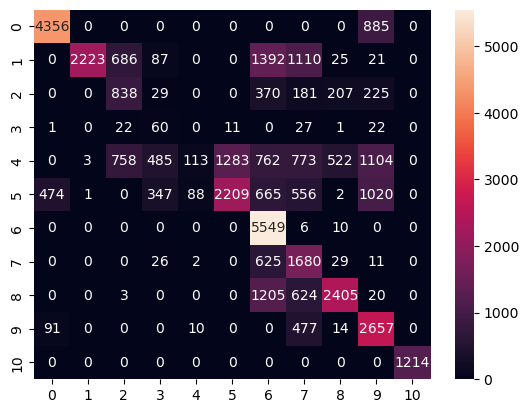

In [250]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test_int, y_pred), annot=True, fmt='d')

In [219]:
# feature importance
# get the feature importance from the xgboost model
feature_importance = xgb_clf.feature_importances_

In [220]:
# get the feature names from the original dataset
feature_names = X_train.columns

In [221]:
# create a dataframe of the feature importance and feature names
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_df.sort_values('importance', ascending=False, inplace=True)

In [222]:
feature_df.head(50)

,feature,importance
119,INITIAL_EVIDENCE_vomiting_cough,0.091552
122,INITIAL_EVIDENCE_wheezing_inhale,0.066208
93,INITIAL_EVIDENCE_coughing_fits,0.063722
96,INITIAL_EVIDENCE_eye_itching,0.061314
101,INITIAL_EVIDENCE_itchy_nose,0.059277
100,INITIAL_EVIDENCE_gained_weight,0.057179
92,INITIAL_EVIDENCE_cough_blood,0.049363
117,INITIAL_EVIDENCE_ulcers,0.035626
90,INITIAL_EVIDENCE_convulsion,0.033623
109,INITIAL_EVIDENCE_red_eye,0.032423


<Axes: >

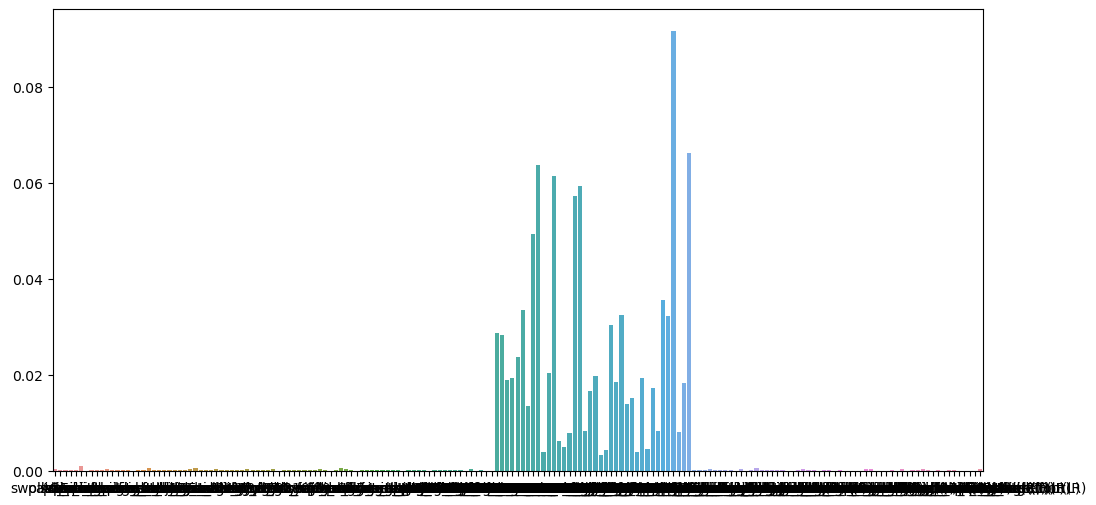

In [223]:
# feature importance plot
plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importance, x=X.columns)

### Neural Network

In [224]:
# importing the keras model and layers
from tensorflow.keras.models import Sequential

In [225]:
# importing different layers
from tensorflow.keras.layers import Dense, Dropout

In [226]:
len(X_train.columns)

179

In [227]:
# creating the model
model = Sequential()

# input layer
model.add(Dense(179, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))

# output layer
model.add(Dense(11, activation='softmax'))

# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [229]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min', 
                           verbose=1, 
                           patience=4)

In [230]:
# fitting the model
model.fit(x=X_train_scaled, 
          y=y_train_int, 
          epochs=30,
          validation_data=(X_test_scaled, y_test_int), verbose=1,
          callbacks=[early_stop])

Epoch 1/30
5076/5076 [==============================] - 5s 911us/step - loss: 0.9711 - accuracy: 0.5792 - val_loss: 0.8640 - val_accuracy: 0.6012
Epoch 2/30
5076/5076 [==============================] - 5s 962us/step - loss: 0.8739 - accuracy: 0.5969 - val_loss: 0.8522 - val_accuracy: 0.6032
Epoch 3/30
5076/5076 [==============================] - 5s 953us/step - loss: 0.8638 - accuracy: 0.5998 - val_loss: 0.8528 - val_accuracy: 0.6061
Epoch 4/30
5076/5076 [==============================] - 5s 911us/step - loss: 0.8605 - accuracy: 0.6010 - val_loss: 0.8486 - val_accuracy: 0.6031
Epoch 5/30
5076/5076 [==============================] - 5s 930us/step - loss: 0.8610 - accuracy: 0.6012 - val_loss: 0.8512 - val_accuracy: 0.6035
Epoch 6/30
5076/5076 [==============================] - 5s 1ms/step - loss: 0.8578 - accuracy: 0.6016 - val_loss: 0.8520 - val_accuracy: 0.6065
Epoch 7/30
5076/5076 [==============================] - 4s 872us/step - loss: 0.8567 - accuracy: 0.6020 - val_loss: 0.8511 - v

In [231]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 179)               32220     
                                                                 
 dropout_6 (Dropout)         (None, 179)               0         
                                                                 
 dense_13 (Dense)            (None, 60)                10800     
                                                                 
 dropout_7 (Dropout)         (None, 60)                0         
                                                                 
 dense_14 (Dense)            (None, 20)                1220      
                                                                 
 dense_15 (Dense)            (None, 11)                231       
                                                                 
Total params: 44,471
Trainable params: 44,471
Non-trai

In [232]:
# model history
model_loss = pd.DataFrame(model.history.history)

<Axes: >

<Figure size 1200x600 with 0 Axes>

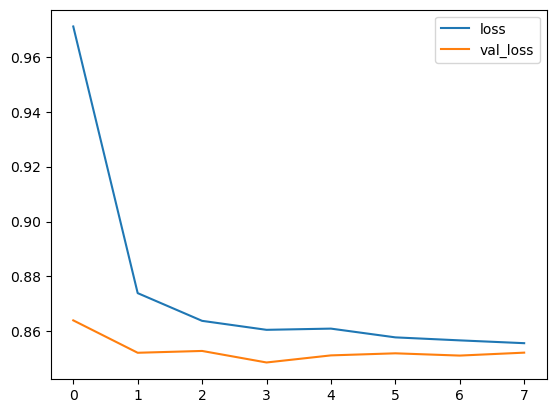

In [233]:
# plot the loss
plt.figure(figsize=(12, 6))
model_loss[['loss', 'val_loss']].plot()

In [237]:
# predict on the test data
y_pred_prob = model.predict(X_test_scaled)

1269/1269 [==============================] - 0s 347us/step


In [238]:
y_pred = np.argmax(y_pred, axis=1)

In [239]:
# classification report and confusion matrix
print(classification_report(y_test_int, y_pred))
print(confusion_matrix(y_test_int, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      5241
           1       0.98      0.40      0.57      5544
           2       0.98      0.24      0.38      1850
           3       1.00      0.23      0.37       144
           4       0.40      0.76      0.53      5803
           5       1.00      0.15      0.27      5362
           6       0.52      1.00      0.69      5565
           7       0.96      0.29      0.45      2373
           8       0.57      0.71      0.63      4257
           9       0.55      0.45      0.50      3249
          10       1.00      1.00      1.00      1214

    accuracy                           0.60     40602
   macro avg       0.80      0.56      0.57     40602
weighted avg       0.74      0.60      0.57     40602

[[4559    0    0    0    0    0    1    0    0  681    0]
 [   0 2235    3    0 1457    0 1400    6  443    0    0]
 [   0   15  438    0  619    1  374    0  387   16    0]
 [   3    1  

<Axes: >

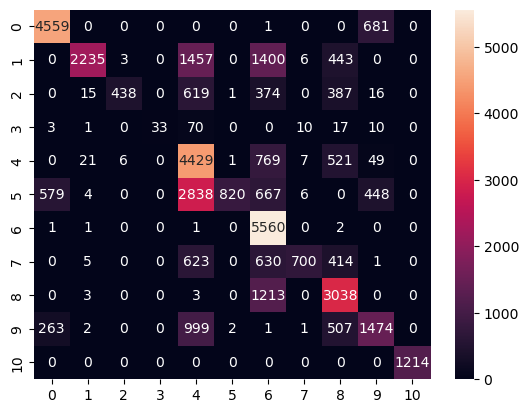

In [240]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test_int, y_pred), annot=True, fmt='d')